# Airline Loyalty Data

## Import Packages

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator


## Read data

In [41]:
df_loyalty = pd.read_csv('../data/airline_data_ai_generated.csv')

## EDA

In [42]:
df_loyalty.head(10)

,Customer ID,Status,Points,Number of Flights (prev year),"Flight Value (EUR, prev year)",Country,Age,Enrollment Date,Point Redemption (prev year),"Ancillary Revenue (EUR, prev year)"
0,1001,Frequent Traveller,663,1,36671,Spain,79,2000-01-01,571,1629
1,1002,HON Circle Member,8789,48,33128,USA,78,2000-01-09,4266,1789
2,1003,Senator,1946,49,23865,UK,37,2000-01-18,1740,2813
3,1004,Frequent Traveller,558,42,22022,Spain,74,2000-01-27,538,4060
4,1005,Base,3,38,17222,Switzerland,22,2000-02-05,3,3210
5,1006,Base,127,40,33148,Spain,53,2000-02-13,92,3309
6,1007,Frequent Traveller,671,40,115,UK,45,2000-02-22,87,839
7,1008,Base,168,49,11340,Canada,67,2000-03-02,105,2694
8,1009,Frequent Traveller,800,15,21046,Canada,61,2000-03-11,718,2580
9,1010,Base,247,44,37270,France,61,2000-03-19,207,1007


In [43]:
df_loyalty.shape

(1000, 10)

In [44]:
df_loyalty.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,1000.0,NaN,NaN,NaN,1500.5,288.819436,1001.0,1250.75,1500.5,1750.25,2000.0
Status,1000,4,Base,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Points,1000.0,NaN,NaN,NaN,1137.392,2137.057446,1.0,249.0,499.0,899.0,19038.0
Number of Flights (prev year),1000.0,NaN,NaN,NaN,24.595,14.373851,1.0,12.0,25.0,37.0,49.0
"Flight Value (EUR, prev year)",1000.0,NaN,NaN,NaN,19682.242,11589.406532,115.0,9610.25,19509.5,29387.75,39993.0
Country,1000,9,Italy,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,48.892,18.161503,18.0,33.0,49.0,65.0,79.0
Enrollment Date,1000,1000,2000-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Point Redemption (prev year),1000.0,NaN,NaN,NaN,580.898,1371.419119,0.0,77.0,210.0,496.25,17809.0
"Ancillary Revenue (EUR, prev year)",1000.0,NaN,NaN,NaN,2531.736,1442.742555,4.0,1336.0,2561.5,3738.25,4998.0


In [45]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         1000 non-null   int64 
 1   Status                              1000 non-null   object
 2   Points                              1000 non-null   int64 
 3   Number of Flights (prev year)       1000 non-null   int64 
 4   Flight Value (EUR, prev year)       1000 non-null   int64 
 5   Country                             1000 non-null   object
 6   Age                                 1000 non-null   int64 
 7   Enrollment Date                     1000 non-null   object
 8   Point Redemption (prev year)        1000 non-null   int64 
 9   Ancillary Revenue (EUR, prev year)  1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.2+ KB


In [46]:
df_loyalty.nunique()

Customer ID                           1000
Status                                   4
Points                                 741
Number of Flights (prev year)           49
Flight Value (EUR, prev year)          986
Country                                  9
Age                                     62
Enrollment Date                       1000
Point Redemption (prev year)           577
Ancillary Revenue (EUR, prev year)     903
dtype: int64

## Verteilung der Punkte

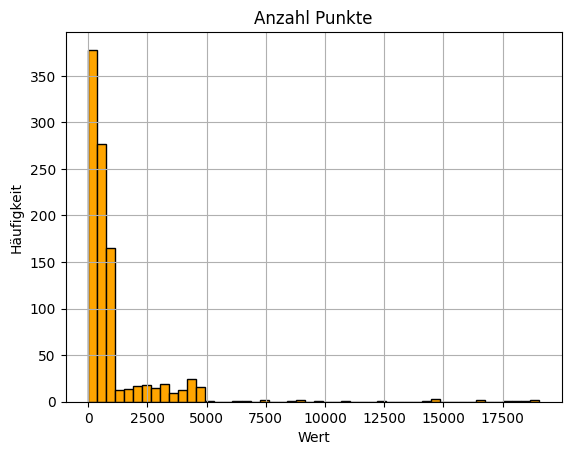

In [54]:
df_loyalty['Points'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Anzahl Punkte')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

## Verteilung Alter

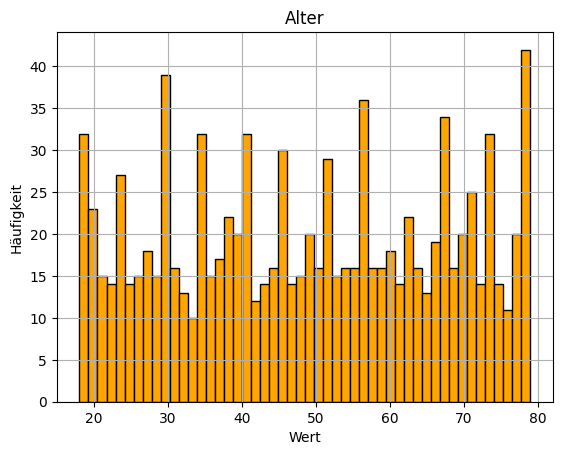

In [53]:
df_loyalty['Age'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Alter')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

## Verteilung der Zahl der Flüge

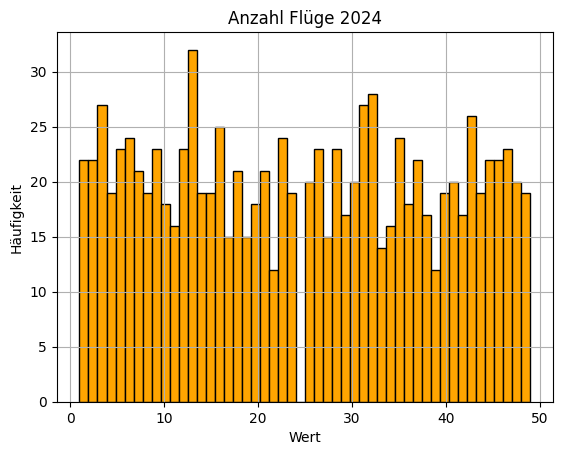

In [55]:
df_loyalty['Number of Flights (prev year)'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Anzahl Flüge 2024')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

## Verteilung Status

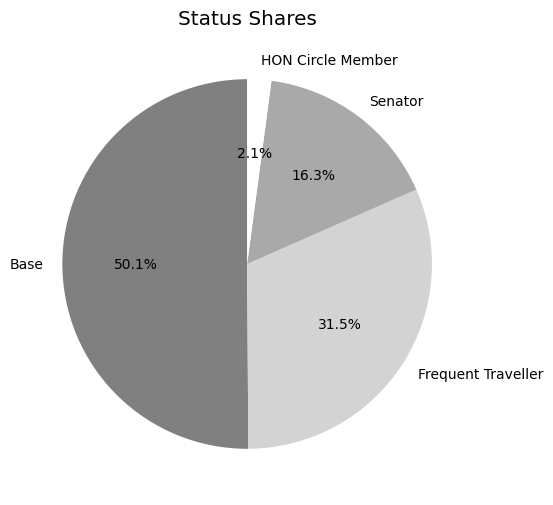

In [129]:
status_counts = df_loyalty['Status'].value_counts()

%matplotlib inline
plt.style.use('ggplot')
colors = ['grey', 'lightgrey', 'darkgrey', 'white']
plt.figure(figsize=(6,6))
plt.pie(status_counts.values, labels=status_counts.index, colors=colors, autopct='%.1f%%', startangle=90)
plt.title('Status Shares')
plt.show()

## Heatmap Korrelation


Korrelation der numerischen Variablen:
                                    Customer ID    Points  \
Customer ID                            1.000000 -0.068000   
Points                                -0.068000  1.000000   
Number of Flights (prev year)         -0.010188  0.037298   
Flight Value (EUR, prev year)         -0.037163  0.013274   
Age                                   -0.022613  0.013192   
Point Redemption (prev year)          -0.027077  0.783961   
Ancillary Revenue (EUR, prev year)     0.038224 -0.017237   

                                    Number of Flights (prev year)  \
Customer ID                                             -0.010188   
Points                                                   0.037298   
Number of Flights (prev year)                            1.000000   
Flight Value (EUR, prev year)                            0.007041   
Age                                                      0.017417   
Point Redemption (prev year)                             

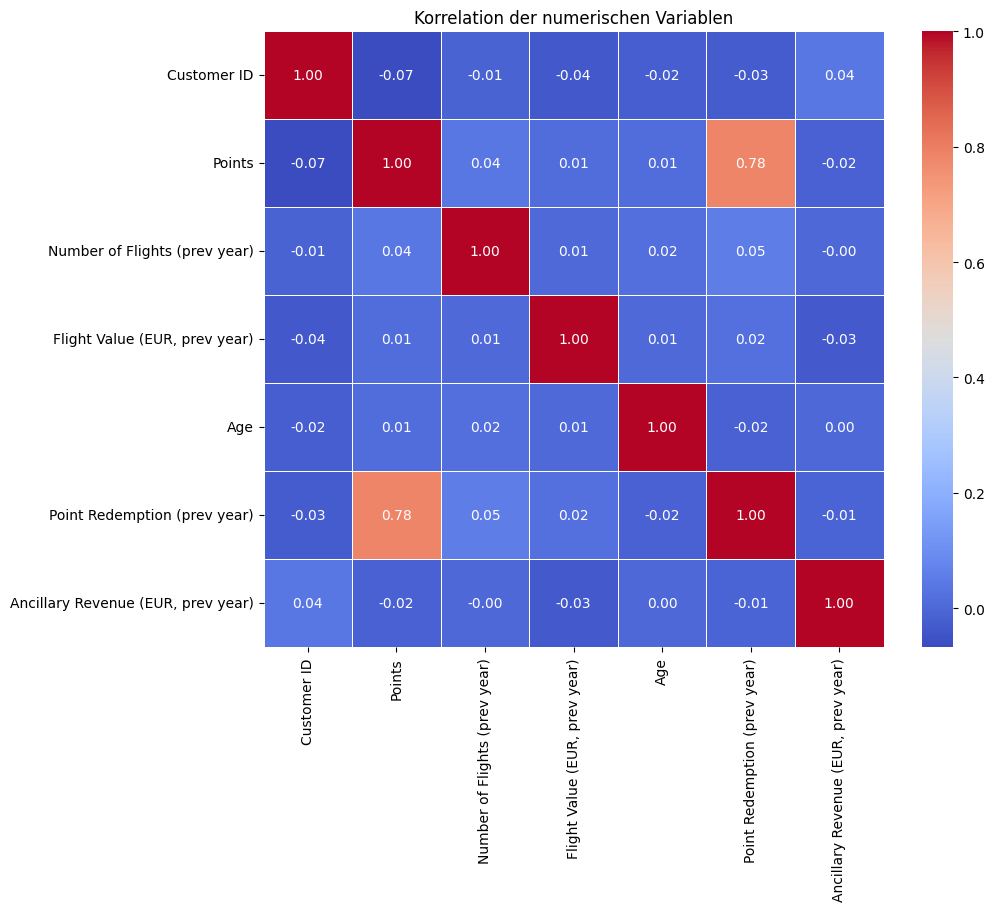

In [49]:
numerische_spalten = df_loyalty.select_dtypes(include=[np.number])

correlation_matrix = numerische_spalten.corr()

print("\nKorrelation der numerischen Variablen:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelation der numerischen Variablen')
plt.show()

## Info numerische Spalten

In [82]:
numeric_columns = df_loyalty.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_loyalty.select_dtypes(exclude=['number']).columns.tolist()

In [83]:
df_loyalty[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,1000.0,1500.500,288.819436,1001.0,1250.75,1500.5,1750.25,2000.0
Points,1000.0,1137.392,2137.057446,1.0,249.00,499.0,899.00,19038.0
Number of Flights (prev year),1000.0,24.595,14.373851,1.0,12.00,25.0,37.00,49.0
"Flight Value (EUR, prev year)",1000.0,19682.242,11589.406532,115.0,9610.25,19509.5,29387.75,39993.0
Age,1000.0,48.892,18.161503,18.0,33.00,49.0,65.00,79.0
Point Redemption (prev year),1000.0,580.898,1371.419119,0.0,77.00,210.0,496.25,17809.0
"Ancillary Revenue (EUR, prev year)",1000.0,2531.736,1442.742555,4.0,1336.00,2561.5,3738.25,4998.0


## Info kategoriale Spalten

In [58]:
if len(categorical_columns) > 0:
    print("\nHäufigkeitsverteilungen kategorialer Spalten:")
    for col in categorical_columns:
        print(f"\n{col}:")
        display(df_loyalty[col].value_counts().head(10))  # Top 10 häufigste Werte
        print(f"Anzahl eindeutiger Werte: {df_loyalty[col].nunique()}")


Häufigkeitsverteilungen kategorialer Spalten:

Status:


Status
Base                  501
Frequent Traveller    315
Senator               163
HON Circle Member      21
Name: count, dtype: int64

Anzahl eindeutiger Werte: 4

Country:


Country
Italy          122
USA            113
Germany        113
France         112
Spain          110
Switzerland    110
UK             109
Canada         108
Netherlands    103
Name: count, dtype: int64

Anzahl eindeutiger Werte: 9

Enrollment Date:


Enrollment Date
2000-01-01    1
2016-02-13    1
2015-10-22    1
2015-10-30    1
2015-11-08    1
2015-11-17    1
2015-11-26    1
2015-12-05    1
2015-12-13    1
2015-12-22    1
Name: count, dtype: int64

Anzahl eindeutiger Werte: 1000


## Verteilung numerische Spalten

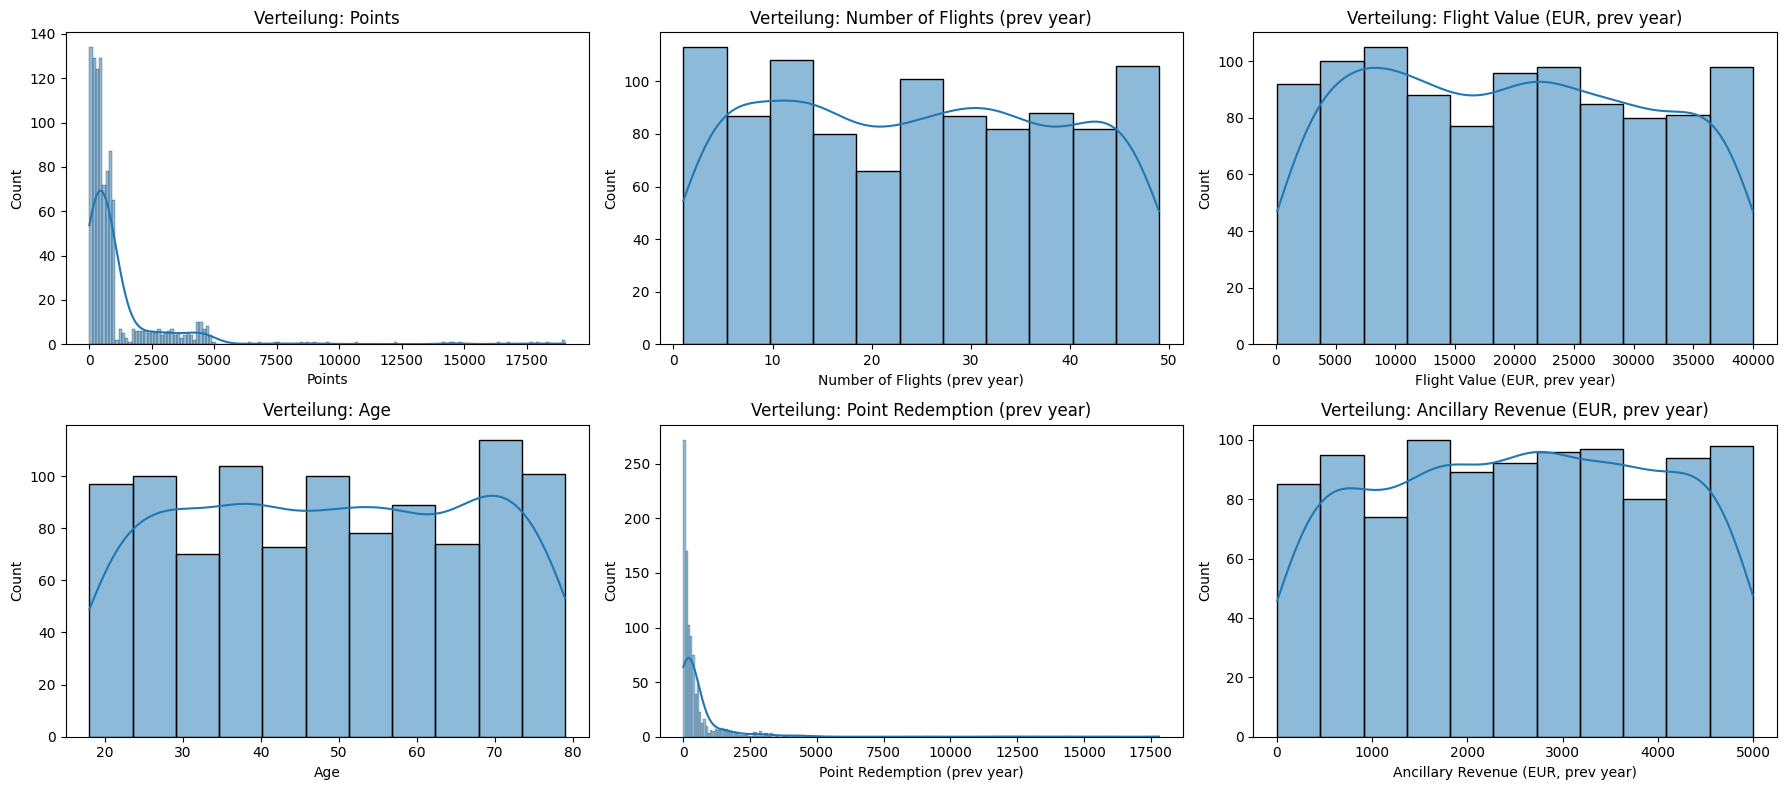

In [84]:
column_to_skip = 'Customer ID'

numeric_columns = [col for col in numeric_columns if col != column_to_skip]


if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i+1)
        sns.histplot(df_loyalty[column].dropna(), kde=True)
        plt.title(f'Verteilung: {column}')
    plt.tight_layout()
    plt.show()

## Verteilung kategoriale Spalten

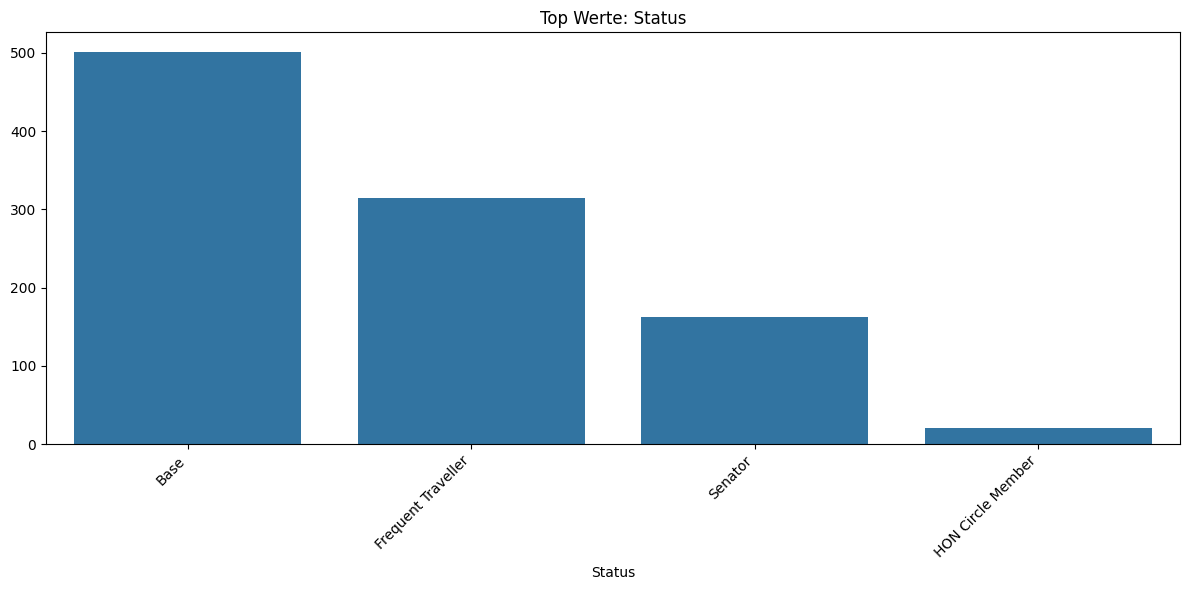

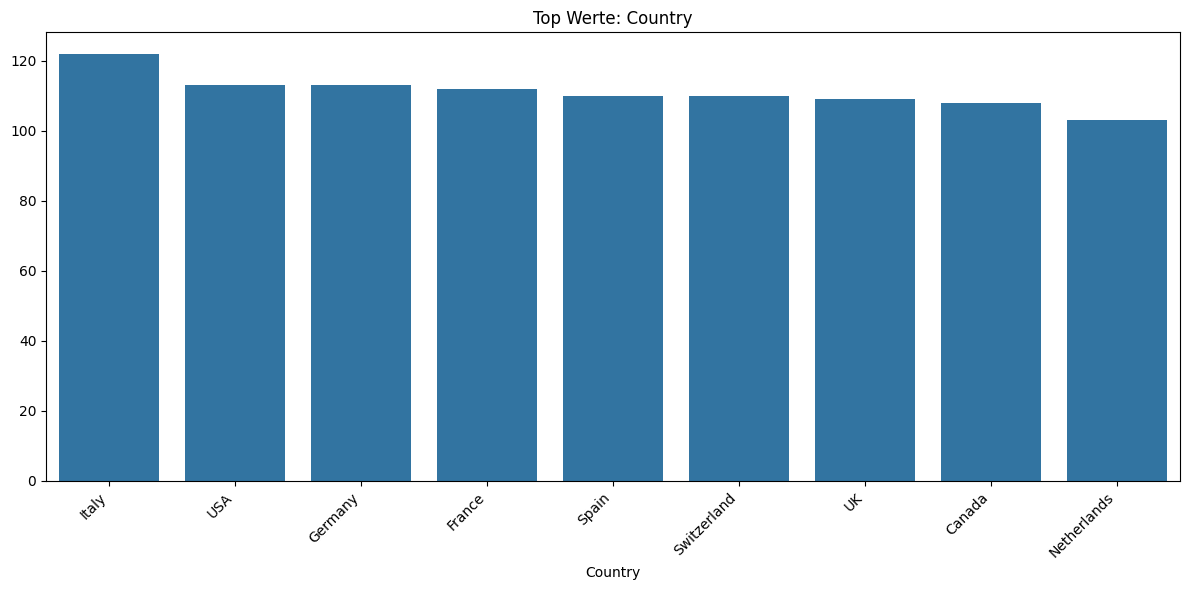

In [73]:
cat_column_to_skip = 'Enrollment Date'

categorical_columns = [col for col in categorical_columns if col != cat_column_to_skip]


if len(categorical_columns) > 0:
    for col in categorical_columns:
        plt.figure(figsize=(12, 6))
        top_cats = df_loyalty[col].value_counts().head(15) 
        sns.barplot(x=top_cats.index, y=top_cats.values)
        plt.title(f'Top Werte: {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Ausreißeranalyse

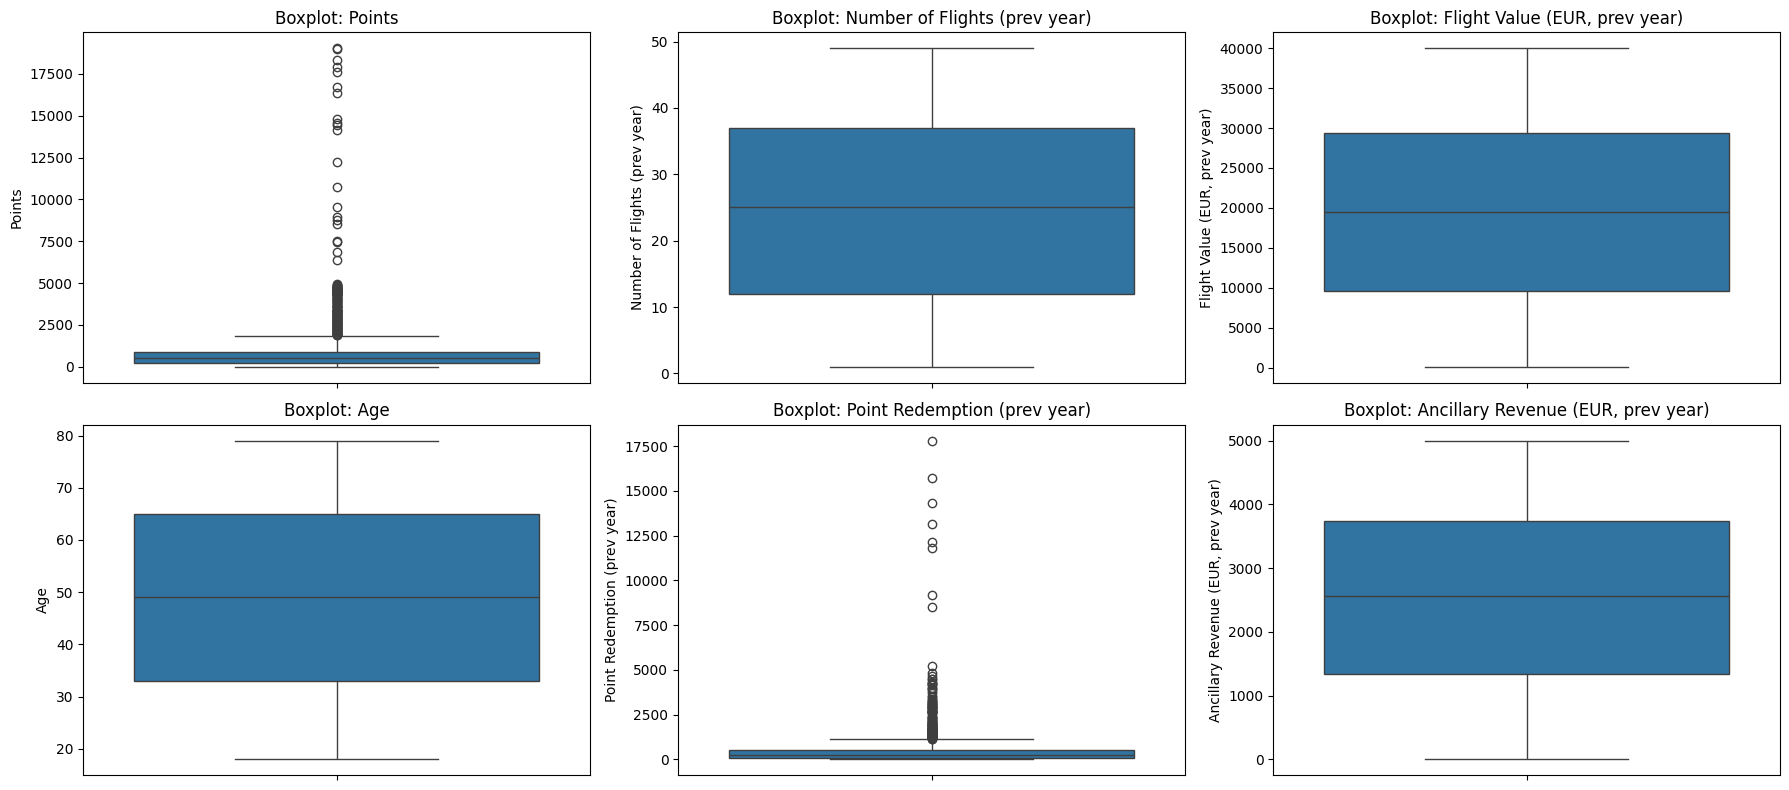

In [78]:
if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i+1)
        sns.boxplot(y=df_loyalty[column].dropna())
        plt.title(f'Boxplot: {column}')
    plt.tight_layout()
    plt.show()

In [130]:
z_scores = pd.DataFrame(index=df_loyalty.index)  

for column in numeric_columns:
    col_data = df_loyalty[column]
    
    if col_data.isnull().sum() == 0:
        z_scores[column] = np.abs(stats.zscore(col_data))
    
    else:
        non_null_data = col_data.dropna()
        
        z = stats.zscore(non_null_data)
        
        z_series = pd.Series(z, index=non_null_data.index)
        
        z_scores[column] = z_series


# Ausreißer identifizieren (|z| > 3)
print("Anzahl der Ausreißer pro numerischer Spalte (|z| > 3):")
display((z_scores > 3).sum())


Anzahl der Ausreißer pro numerischer Spalte (|z| > 3):


Points                                17
Number of Flights (prev year)          0
Flight Value (EUR, prev year)          0
Age                                    0
Point Redemption (prev year)          10
Ancillary Revenue (EUR, prev year)     0
dtype: int64

## Skalieren und Elbow-Methode zur Bestimmung der Cluster Anzahl

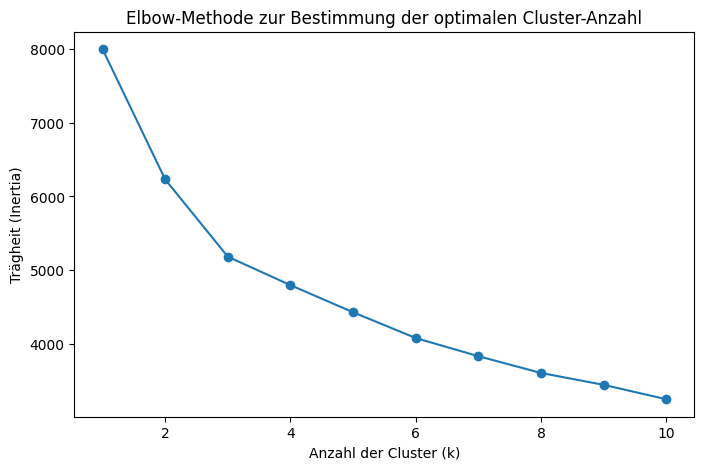

In [112]:
numeric_columns_scaler = df_loyalty.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns_scaler)

inertia_values = []

# Cluster-Anzahl von 1 bis 10
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Elbow-Kurve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Trägheit (Inertia)')
plt.title('Elbow-Methode zur Bestimmung der optimalen Cluster-Anzahl')
plt.show()


## Bestimmung Elbow-Punkt

In [117]:
knee = KneeLocator(K_range, inertia_values, curve='convex', direction='decreasing')

print(f"Optimale Cluster-Anzahl: {knee.knee}")

Optimale Cluster-Anzahl: 3


## K-Means Clustering

/Users/verena/repos/miniconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


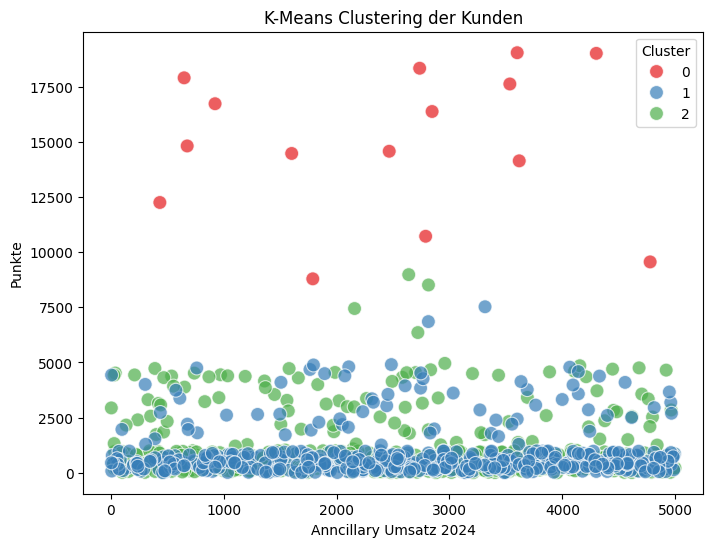

In [116]:
kmeans = KMeans(n_clusters=3, random_state=42) 
df_loyalty['Cluster'] = kmeans.fit_predict(scaled_data)


# Visualisierung der Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_loyalty['Ancillary Revenue (EUR, prev year)'], y=df_loyalty['Points'], hue=df_loyalty['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering der Kunden')
plt.xlabel('Anncillary Umsatz 2024')
plt.ylabel('Punkte')
plt.legend(title='Cluster')
plt.show()

/Users/verena/repos/miniconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


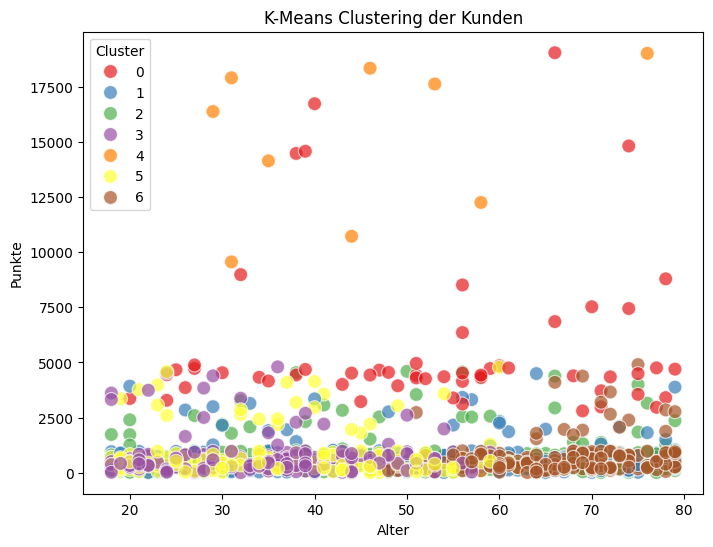

In [110]:
kmeans = KMeans(n_clusters=7, random_state=42) 
df_loyalty['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualisierung der Cluster II
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_loyalty['Age'], y=df_loyalty['Points'], hue=df_loyalty['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering der Kunden')
plt.xlabel('Alter')
plt.ylabel('Punkte')
plt.legend(title='Cluster')
plt.show()